> 📘 **Note:**  
> Please go to **File → Save a copy in Drive** before you make any edits.  
> This creates your own editable version while keeping the instructor’s original unchanged.


#🧭 BUSI 650 – Week 2: Business Data & Probability Foundations

##What we’ll do today

Types of data (cross-section, time-series, panel)

Structured vs unstructured data

Variable types & data characteristics (categorical / numerical; int, float, string, boolean)

Descriptive stats: mean, median, mode, variance, standard deviation

Random variables & discrete probability, Expected Value (EV), risk (variance/SD)

Binomial & Poisson distributions in business

In [1]:
# Import core libraries used in this class
import numpy as np        # numerical computing: arrays, random numbers, math
import pandas as pd       # data tables (spreadsheets in Python)
import matplotlib.pyplot as plt  # simple charts

# Show versions so students know their environment is ready
print("NumPy:", np.__version__)       # prints NumPy version
print("Pandas:", pd.__version__)      # prints Pandas version


NumPy: 2.0.2
Pandas: 2.2.2


##1) Types of Data (Cross-Section, Time-Series, Panel)
🧩 Concept

### 1️⃣ Cross-Sectional Data  
- **Definition:** Data collected at one point in time.  
- **Example:** A customer satisfaction survey conducted in March 2025 across all branches.  
- **Business use:** Comparing different units (regions, stores, employees) *at one time*.  

### 2️⃣ Time-Series Data  
- **Definition:** Data collected at successive, equally spaced time intervals.  
- **Example:** Monthly revenue for 2023–2025.  
- **Business use:** Trend or seasonality analysis, forecasting.

### 3️⃣ Panel Data  
- **Definition:** Combination of cross-sectional + time-series — multiple entities tracked over time.  
- **Example:** Sales for 10 stores tracked monthly for 2 years.  
- **Business use:** Comparing changes across stores, employees, or products.

In [23]:
# --- Cross-sectional example: a snapshot at one time ---
cross = pd.DataFrame({                     # create a small table (DataFrame)
    "Store": ["A","B","C","D"],            # store ids (categorical labels)
    "Satisfaction": [4.2, 3.8, 4.5, 4.0],  # numeric ratings (floats)
    "Region": ["West","East","East","West"]# regions (categorical labels)
})
cross                                        # show the table


,Store,Satisfaction,Region
0,A,4.2,West
1,B,3.8,East
2,C,4.5,East
3,D,4.0,West


In [24]:
# --- Time-series example: one unit measured over time ---
dates = pd.date_range("2024-01-01", periods=12, freq="MS")  # monthly period starts
sales = pd.Series([42,45,40,50,55,60,58,63,61,64,66,72], index=dates)  # monthly sales
sales.to_frame("Sales")                                      # show as a one-column table


,Sales
2024-01-01,42
2024-02-01,45
2024-03-01,40
2024-04-01,50
2024-05-01,55
2024-06-01,60
2024-07-01,58
2024-08-01,63
2024-09-01,61
2024-10-01,64


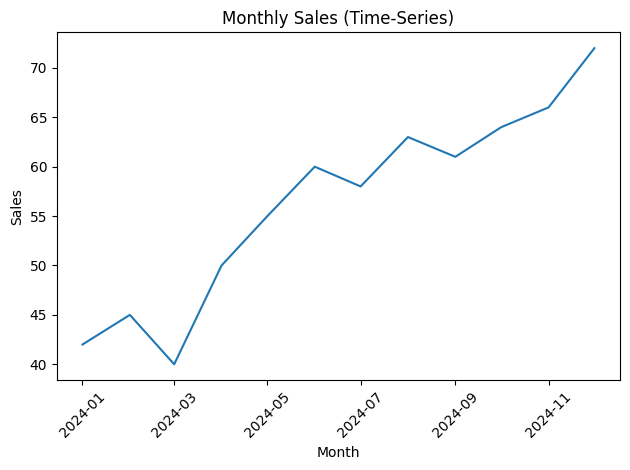

In [4]:
# Plot the time-series (single plot, simple)
plt.figure()                  # start a new figure
plt.plot(sales.index, sales)  # line plot of sales over time
plt.title("Monthly Sales (Time-Series)")  # chart title
plt.xlabel("Month")           # x-axis label
plt.ylabel("Sales")           # y-axis label
plt.xticks(rotation=45)       # rotate month labels so they don't overlap
plt.tight_layout()            # tidy up layout
plt.show()                    # display the chart


In [5]:
# --- Panel example: many units across time (store x month) ---
stores = ["A","B","C"]                                       # three stores
months = pd.date_range("2024-01-01", periods=6, freq="MS")   # 6 months
records = []                                                 # empty list to collect rows

rng = np.random.default_rng(0)                               # random generator for reproducibility
for s in stores:                                             # loop over each store
    base = rng.integers(45, 60)                              # random starting level
    growth = rng.integers(-2, 3, size=len(months)).cumsum()  # random walk across months
    for m, val in zip(months, base + growth):                # pair month with a value
        records.append({"Store": s, "Month": m, "Sales": int(val)})  # add one row

panel = pd.DataFrame(records)                                # make a DataFrame
panel.head(10)                                               # peek at first 10 rows


,Store,Month,Sales
0,A,2024-01-01,58
1,A,2024-02-01,58
2,A,2024-03-01,57
3,A,2024-04-01,56
4,A,2024-05-01,54
5,A,2024-06-01,52
6,B,2024-01-01,43
7,B,2024-02-01,45
8,B,2024-03-01,46
9,B,2024-04-01,48


##2) Structured vs Unstructured Data
🧩 Concept


### **Structured Data**  
- Organized into rows & columns.  
- Stored in databases, easy to analyze with Excel or SQL.  
- **Examples:** Payroll table, CRM records, inventory spreadsheet.
Structured = rows & columns (Excel/SQL). Easy to filter, aggregate.

### **Unstructured Data**  
- No fixed format or predefined fields.  
- Requires additional processing before analysis.  
- **Examples:** Emails, tweets, PDF reports, customer videos, support call audio.  
Unstructured = text, audio, images (emails, tweets, call notes). Valuable but messy; needs preprocessing or AI/NLP.

**Business Connection:**  
> “Structured data answers ‘how many’ questions; unstructured data often explains ‘why.’”




🔧 Code: classify examples quickly

In [6]:
# Let's list a few data sources and tag them as structured or unstructured
sources = [
    ("Payroll spreadsheet", "Structured"),   # neat rows/columns
    ("Customer tweets", "Unstructured"),     # free-form text
    ("CRM database", "Structured"),
    ("Support call recordings", "Unstructured"),
    ("Invoice table", "Structured"),
    ("App store reviews", "Unstructured")
]

df_sources = pd.DataFrame(sources, columns=["Data Source","Type"])  # make small table
df_sources                                                           # display it


,Data Source,Type
0,Payroll spreadsheet,Structured
1,Customer tweets,Unstructured
2,CRM database,Structured
3,Support call recordings,Unstructured
4,Invoice table,Structured
5,App store reviews,Unstructured


##3) Variable Types & Data Characteristics
🧩 Concept

### **Categorical Variables**
- Represent labels or groups.  
- **Examples:** Region, Department, Product Category.  
- Can be **nominal** (no order, e.g., region) or **ordinal** (ordered, e.g., satisfaction level).

### **Numerical Variables**
- Represent quantities.  
- **Discrete:** Countable values (e.g., # of purchases).  
- **Continuous:** Measured on a scale (e.g., revenue $, temperature).

### **Underlying Data Characteristics**
| Type | Meaning | Example |
|:---|:---|:---|
| **int** | Whole numbers | Employees = 25 |
| **float** | Decimal numbers | Revenue = 25 630.75 |
| **str** | Text or labels | Department = "Finance" |
| **bool** | True/False | Active Customer = True |

🔧 Code: inspect types and categories

In [7]:
# Build a tiny dataset mixing types
customers = pd.DataFrame({
    "CustomerID": [101, 102, 103],   # int (whole numbers)
    "Region": ["West","East","West"],# string (text labels = categorical)
    "Age": [32, 45, 28],             # int (can be treated as numeric)
    "PurchaseAmount": [480.50, 250.00, 600.75],  # float (decimals)
    "Active": [True, False, True]    # bool (True/False)
})

customers                                                          # show table


,CustomerID,Region,Age,PurchaseAmount,Active
0,101,West,32,480.50,True
1,102,East,45,250.00,False
2,103,West,28,600.75,True


In [8]:
# Show pandas' inferred data types
customers.dtypes   # tells us the Python/pandas data types of each column


,0
CustomerID,int64
Region,object
Age,int64
PurchaseAmount,float64
Active,bool


In [9]:
# Count categories in a categorical-like column
customers["Region"].value_counts()  # frequency of each region label


,count
Region,
West,2
East,1


##4) Descriptive Statistics Refresher

(Mean, Median, Mode, Variance, Standard Deviation)

🧩 Concept

Mean: arithmetic average (sensitive to outliers)

Median: middle value (robust to outliers)

Mode: most frequent

Variance/SD: how spread out values are (risk/volatility)

🔧 Code: simple salary example

In [10]:
# Small salary dataset without outliers
salaries = np.array([40_000, 45_000, 50_000, 55_000, 60_000])  # underscore = thousands separator

# Compute basic stats "by hand" to see formulas clearly:
mean_val = salaries.mean()                               # average of the numbers
median_val = np.median(salaries)                         # middle value when sorted
# Mode for numeric array: we'll compute the most frequent value
vals, counts = np.unique(salaries, return_counts=True)   # unique values and their counts
mode_val = vals[counts.argmax()]                         # value with highest count

# Variance & Standard Deviation (population version for teaching clarity)
mu = mean_val                                            # the mean
variance = np.mean((salaries - mu)**2)                   # average squared distance from mean
std_dev = np.sqrt(variance)                              # square root of variance = standard deviation

print("Mean:", mean_val)                                 # show the mean
print("Median:", median_val)                             # show the median
print("Mode:", mode_val)                                 # show the mode
print("Variance:", variance)                             # show the variance
print("Standard Deviation:", std_dev)                    # show the standard deviation


Mean: 50000.0
Median: 50000.0
Mode: 40000
Variance: 50000000.0
Standard Deviation: 7071.067811865475


In [11]:
# Add an outlier to see impact on mean vs median
salaries_outlier = np.append(salaries, 200_000)      # add one very large salary

print("New Mean (with outlier):", salaries_outlier.mean())      # mean pulled up a lot
print("New Median (with outlier):", np.median(salaries_outlier))# median barely moves


New Mean (with outlier): 75000.0
New Median (with outlier): 52500.0


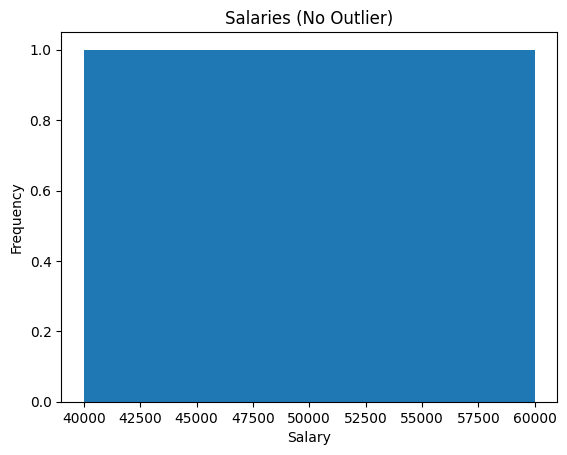

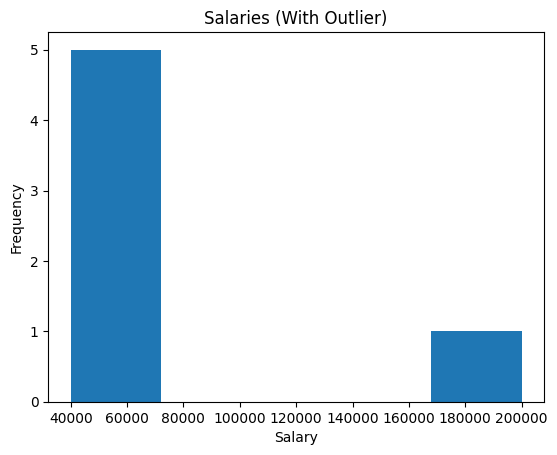

In [12]:
# Quick visualization: histogram of salaries with and without outlier
plt.figure()                                   # new figure
plt.hist(salaries, bins=5)                     # histogram for original salaries
plt.title("Salaries (No Outlier)")             # title
plt.xlabel("Salary")                           # x label
plt.ylabel("Frequency")                        # y label
plt.show()                                     # display

plt.figure()                                   # another figure
plt.hist(salaries_outlier, bins=5)             # histogram including outlier
plt.title("Salaries (With Outlier)")           # title
plt.xlabel("Salary")                           # x label
plt.ylabel("Frequency")                        # y label
plt.show()                                     # display


##5) Random Variables & Discrete Probability
🧩 Concept

**Definition:**  
A *random variable* is a numerical outcome whose value depends on chance.  

**Business Examples:**  
- HR → Number of employees who resign this month.  
- Marketing → Number of ad clicks per day.  
- Operations → Number of machine breakdowns per week.

**Definition:** A *discrete probability distribution* lists all possible values of a discrete random variable and their probabilities.  
The probabilities must sum to 1.

**Simple table example:**

| x (customers buying) | 0 | 1 | 2 | 3 |
|:---|:---:|:---:|:---:|:---:|
| P(x) | 0.1 | 0.3 | 0.4 | 0.2 |

Interpretation: 40 % chance that two customers buy today.

**Exercise 4 (3 min):**  
Ask: “What’s the probability that at least one customer buys?” → 1 − 0.1 = 0.9 (90 %).

### **Expected Value (EV)**
- Long-run average outcome of a random process.  
- **Formula:** E(X) = Σ [x × P(x)]  
- **Analogy:** Average profit you expect per campaign if you run it many times.

**Example (Marketing ROI):**

| Outcome | Profit ($) | Probability |
|:---|:---:|:---:|
| Poor | 1 000 | 0.2 |
| Average | 5 000 | 0.5 |
| Excellent | 10 000 | 0.3 |

EV = (1 000×0.2) + (5 000×0.5) + (10 000×0.3) = **$6 100**

**Variance (σ²)** = Σ [(x − E(X))² × P(x)]  
**Standard Deviation (σ)** = √Variance  
→ Measures the volatility or risk of returns.

**Interpretation:**  
Higher σ = more uncertain results.

**Exercise 5 (5 min):**  
Students compute EV for a small example you project and discuss:  
“Would you invest in a campaign with higher average profit but higher volatility?”

🔧 Code: simple marketing ROI distribution

In [13]:
# Define outcomes and their probabilities for a campaign's profit
outcomes = np.array([1_000, 5_000, 10_000])  # profit outcomes in dollars
probs    = np.array([0.2,   0.5,    0.3])    # associated probabilities

# Validity checks for a probability mass function (PMF)
print("All probabilities between 0 and 1?:", np.all((probs >= 0) & (probs <= 1)))  # check bounds
print("Probabilities sum to 1?:", np.isclose(probs.sum(), 1.0))                    # check total

# Expected Value (long-run average)
ev = np.sum(outcomes * probs)                        # Σ x p
# Variance around EV: Σ (x - EV)^2 p
var = np.sum(((outcomes - ev)**2) * probs)           # weighted squared deviations
sd  = np.sqrt(var)                                   # standard deviation = sqrt(variance)

print("Expected Value (EV):", ev)                    # show EV = $6100
print("Variance:", var)                              # show variance
print("Standard Deviation:", sd)                     # show SD (risk)


All probabilities between 0 and 1?: True
Probabilities sum to 1?: True
Expected Value (EV): 5700.0
Variance: 10210000.0
Standard Deviation: 3195.3090617340913


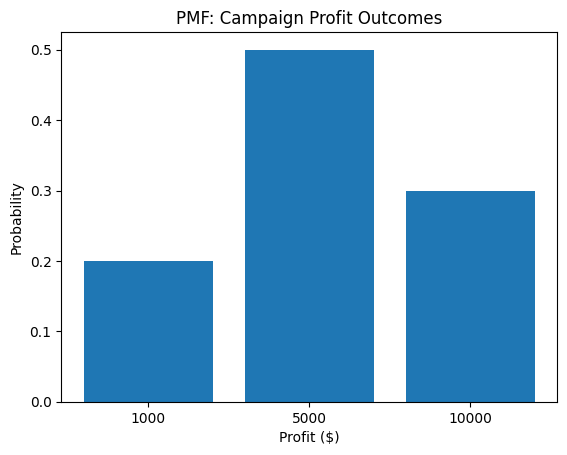

In [14]:
# Visualize the probability mass function (PMF) as a bar chart
plt.figure()                                           # new figure
plt.bar([str(x) for x in outcomes], probs)             # bars labeled by outcome values
plt.title("PMF: Campaign Profit Outcomes")             # title
plt.xlabel("Profit ($)")                               # x label
plt.ylabel("Probability")                              # y label
plt.show()                                             # display


In [15]:
# Monte Carlo simulation: verify that sample average ~ EV over many runs
rng = np.random.default_rng(1)                         # random generator (seeded)
simulated = rng.choice(outcomes, size=100_000, p=probs)# draw many outcomes according to probs
print("Simulated mean (≈ EV):", simulated.mean())      # should be close to EV
print("Simulated std (≈ SD):", simulated.std())        # close to theoretical SD


Simulated mean (≈ EV): 5707.15
Simulated std (≈ SD): 3196.7935306334693


##6) Binomial Distribution (Yes/No outcomes repeated)
🧩 Concept

**Definition:**  
The Binomial distribution describes the number of successes in *n* independent trials with constant success probability *p*.

**Key Characteristics:**  
- Each trial has two outcomes (success/failure).  
- Trials are independent.  
- Probability of success (p) stays the same.

**Examples:**  
- Marketing → # of emails opened out of 100 sent (p = 0.25).  
- HR → # of employees who accept offers out of 10.  
- Manufacturing → # of defective items in a batch of 50.

**Intuitive Explanation:**  
> “If 30 % of customers usually buy after seeing an ad, the binomial distribution tells us the probability that exactly 3 of 10 viewers will purchase.”

You can illustrate by simulation or Excel’s `BINOM.DIST` function.

🔧 Code: compute probabilities + expectation/risk

(We’ll implement both a “no library” version and a SciPy version if available.)

In [16]:
# Binomial basics without extra libraries
import math                                        # for combinations nCk

n = 20                                             # number of trials (e.g., 20 emails)
p = 0.30                                           # probability of success (e.g., 30% open rate)

def binom_pmf_no_lib(k, n, p):
    """Probability of exactly k successes in n trials with success prob p (Binomial PMF)."""
    comb = math.comb(n, k)                         # n choose k
    return comb * (p**k) * ((1-p)**(n-k))          # nCk p^k (1-p)^(n-k)

# Example: probability of exactly 5 opens
k = 5                                              # number of successes
prob_5 = binom_pmf_no_lib(k, n, p)                 # compute pmf at k=5
print(f"P(X={k}) with n={n}, p={p}:", prob_5)      # show probability

# Theoretical mean/variance of Binomial: mean = n*p, var = n*p*(1-p)
binom_ev = n * p                                   # expected number of successes
binom_var = n * p * (1 - p)                        # variance
binom_sd = math.sqrt(binom_var)                    # standard deviation

print("Binomial EV (n*p):", binom_ev)              # expected successes
print("Binomial SD (sqrt(n*p*(1-p))):", binom_sd)  # risk (spread)


P(X=5) with n=20, p=0.3: 0.17886305056987956
Binomial EV (n*p): 6.0
Binomial SD (sqrt(n*p*(1-p))): 2.0493901531919194


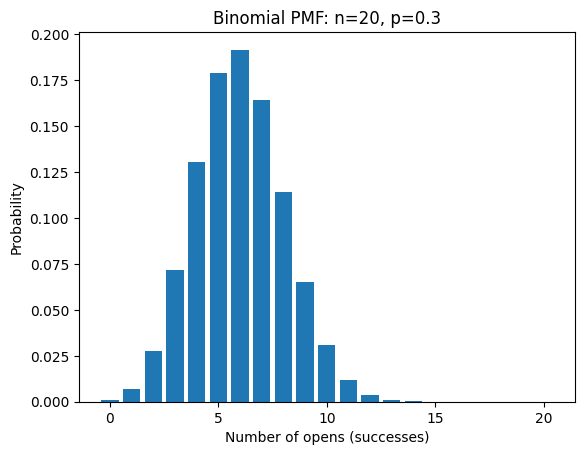

SciPy OK: used binom.pmf for the chart above.


In [17]:
# If SciPy is available in your Colab, this is even simpler:
try:
    from scipy.stats import binom                    # import Binomial from SciPy
    k_values = np.arange(0, n+1)                     # all possible success counts
    pmf_vals = binom.pmf(k_values, n, p)             # compute pmf for each k

    # Plot the PMF (probability for each possible number of opens)
    plt.figure()
    plt.bar(k_values, pmf_vals)
    plt.title(f"Binomial PMF: n={n}, p={p}")
    plt.xlabel("Number of opens (successes)")
    plt.ylabel("Probability")
    plt.show()

    print("SciPy OK: used binom.pmf for the chart above.")  # confirmation
except Exception as e:
    print("SciPy not available, used custom PMF earlier.", e)  # fallback message


##7) Poisson Distribution (Counts in a time/space interval)
🧩 Concept

**Definition:**  
Describes the probability of a given number of events occurring in a fixed interval of time or space when events occur rarely but independently.  
Parameter λ (lambda) = average rate of occurrence.

**Examples:**  
- Call center: number of calls per hour (λ = 6).  
- HR: number of resignations per month.  
- IT: system failures per week.

**Explanation:**  
> “If a help desk receives on average 6 calls per hour, the Poisson distribution can estimate the probability of getting exactly 4 calls in the next hour.”

**Rule of thumb:** When *n* is large and *p* is small, Binomial ≈ Poisson.


🔧 Code: compute probabilities + expectation/risk

##Exercise

### 🧭 BUSI 650 – Week 2 In-Class Exercise
### Understanding and Describing Data (Simple Example)

**Goal:**  
Today, you’ll learn how to:
1. Understand different types of variables.  
2. Check data structure and types in Python (Colab).  
3. Compute and interpret simple descriptive statistics.

Please follow each step carefully and **run the code cell below each instruction**.

---

## Step 1 – Import Libraries

Run the code below to load Python’s data tools.


In [25]:
import pandas as pd
import numpy as np

print("Libraries are ready!")


Libraries are ready!


## Step 2 – Create a Simple Business Dataset

We’ll create a small example dataset of **10 employees** working in a company.

Each row represents one employee.

Variables:
- `EmployeeID`: Unique ID number (integer)
- `Department`: HR, Finance, or Marketing (categorical)
- `Age`: Employee age (numeric)
- `YearsExperience`: How many years they’ve worked (numeric)
- `MonthlySalary`: Salary in dollars (numeric)
- `IsFullTime`: Whether they’re full-time or not (True/False)

Run the next cell to create it.


In [ ]:
data = {
    "EmployeeID": [1,2,3,4,5,6,7,8,9,10],
    "Department": ["HR","Finance","HR","Marketing","Finance","HR","Marketing","Finance","HR","Marketing"],
    "Age": [25,30,29,35,40,45,28,32,38,26],
    "YearsExperience": [1,5,3,8,10,12,2,6,9,1],
    "MonthlySalary": [3000,5000,4200,6000,7500,8000,3500,5500,7000,3200],
    "IsFullTime": [True,True,True,True,True,True,False,True,True,False]
}

df = pd.DataFrame(data)
df


## Step 3 – Look at the Data
Use the `.head()` function to see the first few rows.


In [32]:
df.head()


,EmployeeID,Department,Age,YearsExperience,MonthlySalary,IsFullTime
0,1,HR,25,1,3000,True
1,2,Finance,30,5,5000,True
2,3,HR,29,3,4200,True
3,4,Marketing,35,8,6000,True
4,5,Finance,40,10,7500,True


## Step 4 – Check Data Structure and Types
Use `.info()` to see data types of each column.


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       10 non-null     int64 
 1   Department       10 non-null     object
 2   Age              10 non-null     int64 
 3   YearsExperience  10 non-null     int64 
 4   MonthlySalary    10 non-null     int64 
 5   IsFullTime       10 non-null     bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 542.0+ bytes


## Step 5 – Descriptive Statistics for Numerical Variables
We can use `.describe()` to summarize all numeric data.


In [34]:
df.describe()


,EmployeeID,Age,YearsExperience,MonthlySalary
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,32.800000,5.700000,5290.000000
std,3.02765,6.545567,3.945462,1819.310004
min,1.00000,25.000000,1.000000,3000.000000
25%,3.25000,28.250000,2.250000,3675.000000
50%,5.50000,31.000000,5.500000,5250.000000
75%,7.75000,37.250000,8.750000,6750.000000
max,10.00000,45.000000,12.000000,8000.000000


## Step 6 – Compute Mean, Median, Mode for MonthlySalary
Let’s find the average (mean), the middle (median), and the most common (mode) salary.


In [35]:
print("Mean:", df["MonthlySalary"].mean())
print("Median:", df["MonthlySalary"].median())
print("Mode:", df["MonthlySalary"].mode()[0])


Mean: 5290.0
Median: 5250.0
Mode: 3000


## Step 7 – Find Variance and Standard Deviation
Variance and standard deviation tell us **how spread out** the data is.


In [36]:
print("Variance:", df["MonthlySalary"].var())
print("Standard Deviation:", df["MonthlySalary"].std())


Variance: 3309888.888888889
Standard Deviation: 1819.3100035147636


## Step 8 – Frequency Table for Departments
We can see how many employees are in each department.


In [37]:
df["Department"].value_counts()


,count
Department,
HR,4
Finance,3
Marketing,3


## Step 9 – Mini Tasks for You 🎯
1. Calculate **mean, median, and SD** for `YearsExperience`.  
2. Which department has the **highest number of employees**?  
3. What percent of employees are **full-time**?  
4. Based on these results, write 2–3 lines about what you’ve learned about this company.

---

✅ **You just performed real data analysis in Python!**
Next week, we’ll visualize this data and learn how to describe patterns and relationships.
